# BUISNESS CASE: Using The FIFA20 DATASET We Need to Cluster the Players By Their Skills Into Certain Groups.

  ## Data Analysis Report ( High Level)
1) The fifa20 dataset contains  wide range of information about different players, including their age, nationality, club, position,how much they earn,their potential and various attributes such as pace, shooting, passing,dribbling, and many others related to attacking, goalkeeping, defending ,mental traits etc. 

2) There are above 18000+ rows with 100+ attributes in the dataset.  dtypes: float64(16), int64(45), object(43)
3) By checking Null we found columns like below player_tags','loaned_from','nation_position','nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits' have over80% values as Null so can be dropped straight away.
4) Handling Outliers : We can find Outliers in our data and we are have imputed those outliers with median as data is skewed.

5) Scaling the data : we are using MINMAX scaler to bring all the features into the same scale.

6) Feature Creation: we have created new features such as Attack Work Rate and Defense Work Rate with the help of work rate.
7) Our goal in this project is to reduce the dimensionality of the dataset so that we can visualize the relationships between the features and clusters in our dataset. We start with 104 features and bring down the dimensionality to below 50 features by selecting key features using our domain knowledge, removing highly correlated features using regression techniques, and then further to just three principal components using PCA.

8) Converting categorical data into Numerical data : we have encoded few features with manual encoding and some with label encoding after trying few combinations of encoding techniques.

9) Feature Selection: We have dropped the columns having high Multicollinearity in this step.

10) Dimensionality Reduction techniques: we have used dimensionality techniques like PCA which simplifies the complexity in high-dimensional data while retaining trends and patterns.

11) Finally we used clustering techniques like KMeans and DBSCAN algorithms and found Kmeans is performing better when compared to DBSCAN.

12) We have used Elbow curve to determine the right number of cluster for the data. 
   

In [132]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [133]:
#Importing the data
data=pd.read_csv(r'E:\Data Scientist\17-JUN-CDS-WEM-BAN\Capstone Project\players_20.csv')
pd.set_option('display.max_columns', None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

# DOMAIN ANALYSIS

### SOFIFA-ID:
Id of fifa20 player

### PLAYER URL:
A URL (Uniform Resource Locator) is a unique identifier used to locate a resource on the Internet. It is also referred to as a web address.

### SHORT NAME:
Short or nick name name of player

### LONG NAME:
Full name of player

### AGE:
Age in years

### DOB:
Date of birth of player

### HEIGHT CM:
Player height in centimeter

### WEIGHT KG:
Player body weight

### NATIONALITY:
Nationality is the legal status, which represents the country from which an individual belongs.

### CLUB:
A group of people formed for the purpose of playing sports.

### OVERALL:
The OVR (Overall) is made up of all the player's ingame stats.

### POTENTIAL:
The potential rating, is the rating they will achieve for sure during the FIFA 20 career mode.

### VALUE EUR:
The value of palyer in euro.

### WAGE EUR:
A living wage is the amount of income needed to provide an player with a basic but socially acceptable standard of living.

### PLAYER POSITIONS:
Positions indicate approximately where each player should be lined up prior to the start of a play.

### PREFEERED FOOT:
Footedness may refer to the foot a player uses to kick with the greatest force and skill.

### INTERNATIONAL REPUTATION:
International reputation is rated with 1-5 stars.

### WEAK FOOT:
A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.

### SKILL MOVES:
skill moves, it is assigned a number between 1 (least complex) and 5 (most complex). Players with higher skills are able to perform more complex moves.

### WORK RATE:
work rates are how hard the player works on each end of the field.

### BODY-TYPE:
A custom body type and character of football payer.

### REAL FACE:
Face scan of real football palyer if it 'yes' then the character is look super realistic.

### RELEASE CLAUSE EUR:
A release clause is the minimum amount of money you're willing to accept for that player.

### PLAYER TAGS:
The tages of player is identified the palyer skills,like [Dribbler, Distance shooter, Crosser, Speedster]

### TEAM POSITION:
The player’s positioning on the field

### TEAM JERSEY NUMBER:
The number on the back of a football player's jersey is to identify a specific player.

### LONED FROM:
It's a temporary restriction placed on player due to their club being short of players.

### JOINED:
Joining date of club

### CONTRACT VALID UNTIL:
The end year of contract of players.

### NATION POSITION:
Nation position is similar to the team position of players.

### NATION JERSEY NUMBER:
Jersey number of player.

### PACE:
Fastest pace of player,striker or winger

### SHOOTING:
shooting is hitting the ball in an attempt to score a goal. It is usually done using the feet or head.

### PASSING:
The purpose of passing is to keep possession of the ball by maneuvering it on the ground between different players with the objective of advancing it up the playing field.

### DRIBLING:
Dribbling Is Maneuvering A Ball By One Player While Moving In A Given Direction, Avoiding Problems’ Attempts To Intercept The Ball.

### DEFENDING:
Defending is most relate to the defender to stop the attack

### PHYSIC:
physic in player means intensity and their effort.

### GK DIVING:
Goal keeper diving to save a shot.

### GK HANDLING:
As a goalkeeper, you are allowed to handle the ball with your hands within your penalty area.

### GK KICKING:
The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is kicked extremely hard to travel a long distance.

### GK REFLEX:
Ability to react quickly.

### GK SPEED:
Spped of goal keeper.

### GK POSITIONING:
Position of goal keeper is around only goal posts.

### PLAYER TRAITS:
A player’s traits are actions that he will be more likely to perform in matches.

### ATTACKING CROSSING:
The aim of a cross is to create the easiest possible scenario for the attacking player to score a goal.

### ATTACKING FINISHING:
Create a attack on field to score a goal

### ATTACKING HEADING ACCURACY:
One of the fundamental principles of the attacking header is to head the ball downwards.

### ATTACKING SHORT PASSING:
Short passes of ball to score a goal

### ATTACKING VOLLEYS:
A volley is an air-borne strike in association football, where a player's foot meets and directs the ball in an angled direction before it has time to reach the ground.

### SKILL DRIBBLING:
The score of dribbling skill with football

### SKILL CURVE:
The curve of football at the time of goal

### SKILL FK ACCURACY:
It stands for field goal. It is when a player kicks a ball through the uprights from a set distance.

### SKILL LONG PASSING:
The long passing skill score of the player

### SKILL BALL CONTROL:
The ball control of the player at playing time

### MOVEMENT ACCERLATION:
how quickly player can increase your velocity towards maximum speed.

### MOVEMENT SPRINT SPPED:
Sprinting speed score of the player.    

### MOVEMENT AGILITY:
Agility is the ability to move quickly and easily, including moving in different directions without losing balance

### MOVEMENT REACTION:
The score of the quick reation of player.

### MOVEMENT BALANCE:
Balance is the ability to control your body in its own space.

### SHOT POWER:
power generate to score a goal.

### POWER JUMPING:
The jumping ability of the player on field.

### POWER STAMINA:
Stamina of player on filed.

### POWER STRENGTH:
Strength of player on field.

### POWER LONG SHOT:
Total no of power long shot of football.

### MENTAILITY AGGRESSION:
aggression is a characteristic that can have many negative as well as positive effects on performance of player.

### MENTALITY INTERCEPTION:
interception is thrown the possession of the ball is given to the other team.

### MENTALITY POSITIONING:
The mentality positioning of player determines how defensive or attacking your players set out to play.

### MENTALITY VISION:
The vision/mindset of player on filed.

### MENTALITIES PENALTIES:
when a player commits an infraction against the rules of the game a foul will be called and a penalty will be assessed.

### MENTALITY COMPOSURE:
composure stand for: Recognize–Regroup–Refocus. The first step is to Recognize that you are dwelling on the mistake, which limits your ability focus on the next play.

### DEFENDING MAKING:
when your team is defending, you want to make the field small and the options of the other team limited.

### DEFENDING STANDING TACKLE:
Defending standing Tackle of the player to get a ball on filed.

### DEFENDING SLIDING TACKLE:
Defending sliding tackle of player to get a ball.

### GOALKEEPING DIVING:
Goal keeper diving to save a goal.

### GOALKEEPING HANDLING:GOALKEEPING HANDLING:
handle the ball with your hands within your penalty area.

### GOALKEEPING KICKING:
A kick taken by the goalkeeper when the attacking team has kicked the ball over the goal line.

### GOALKEEPING POSITIONING:
A Positioning of player to save the goal.

### GOALKEEPING REFLEX:
The reflex of goalkeeper and players.

### THE REMAINING FEATURE IS THE ABBREVATION OF FOOTBALL POSITION SCORE:

# Basic Checks

In [134]:
data.shape  # data consists of 18278 rows and 104 columns

(18278, 104)

In [135]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18278 non-null  int64  
 1    player_url                  18278 non-null  object 
 2    short_name                  18278 non-null  object 
 3    long_name                   18278 non-null  object 
 4    age                         18278 non-null  int64  
 5    dob                         18278 non-null  object 
 6    height_cm                   18278 non-null  int64  
 7    weight_kg                   18278 non-null  int64  
 8    nationality                 18278 non-null  object 
 9    club                        18278 non-null  object 
 10   overall                     18278 non-null  int64  
 11   potential                   18278 non-null  int64  
 12   value_eur                   18278 non-null  int64  
 13   wage_eur      

In [136]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

1) Mean age is 25 (+-5)
2) Average height is around 181.3 cm
3) Average weight 75kg
4) Overall mean score is 66 and overall mean potetial is 71
5) Average wage is 9456 Eur , zero minimum wage is wrong data as wage cannot be zero
6) As per the problem statement mentioned in the project document , we will have to rule out 'overall' feature for modeling, as this could be a dominant feature7)   For our analysis, we will drop all columns unnecessary for our analysis as and when we reach that conclusion. For now, all descriptive columns like sofifa_id, player_url, nationality etc. will be dropped.

In [137]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [138]:
data.describe(include='O').T

count unique  \
player_url        18278  18278   
short_name        18278  17354   
long_name         18278  18218   
dob               18278   6142   
nationality       18278    162   
club              18278    698   
player_positions  18278    643   
preferred_foot    18278      2   
work_rate         18278      9   
body_type         18278     10   
real_face         18278      2   
player_tags        1499     83   
team_position     18038     29   
loaned_from        1048    316   
joined            16990   1760   
nation_position    1126     26   
player_traits      7566    921   
ls                16242     94   
st                16242     94   
rs                16242     94   
lw                16242    107   
lf                16242    103   
cf                16242    103   
rf                16242    103   
rw                16242    107   
lam               16242    103   
cam               16242    103   
ram               16242    103   
lm                16242    100   
lcm               16242     88   
cm                16242     88   
rcm               16242     88   
rm                16242    100   
lwb               16242     98   
ldm               16242     98   
cdm               16242     98   
rdm               16242     98   
rwb               16242     98   
lb                16242     96   
lcb               16242    110   
cb                16242    110   
rcb               16242    110   
rb                16242     96   

                                                                top   freq  
player_url        https://sofifa.com/player/158023/lionel-messi/...      1  
short_name                                             J. Rodríguez     11  
long_name                                                Liam Kelly      3  
dob                                                      1992-02-29    113  
nationality                                                 England   1667  
club                                                   FC Barcelona     33  
player_positions                                                 CB   2322  
preferred_foot                                                Right  13960  
work_rate                                             Medium/Medium   9875  
body_type                                                    Normal  10750  
real_face                                                        No  16310  
player_tags                                               #Strength    514  
team_position                                                   SUB   7820  
loaned_from                                                Sassuolo     17  
joined                                                   2019-07-01   1465  
nation_position                                                 SUB    587  
player_traits                                         Early Crosser    501  
ls                                                             61+2    725  
st                                                             61+2    725  
rs                                                             61+2    725  
lw                                                             63+2    736  
lf                                                             63+2    727  
cf                                                             63+2    727  
rf                                                             63+2    727  
rw                                                             63+2    736  
lam                                                            61+2    748  
cam                                                            61+2    748  
ram                                                            61+2    748  
lm                                                             61+2    809  
lcm                                                            58+2    775  
cm                                                             58+2    775  
rcm                                                      

# Exploratory Data Analysis

In [139]:
# plotting histogram on this numerical columns
col=['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur']

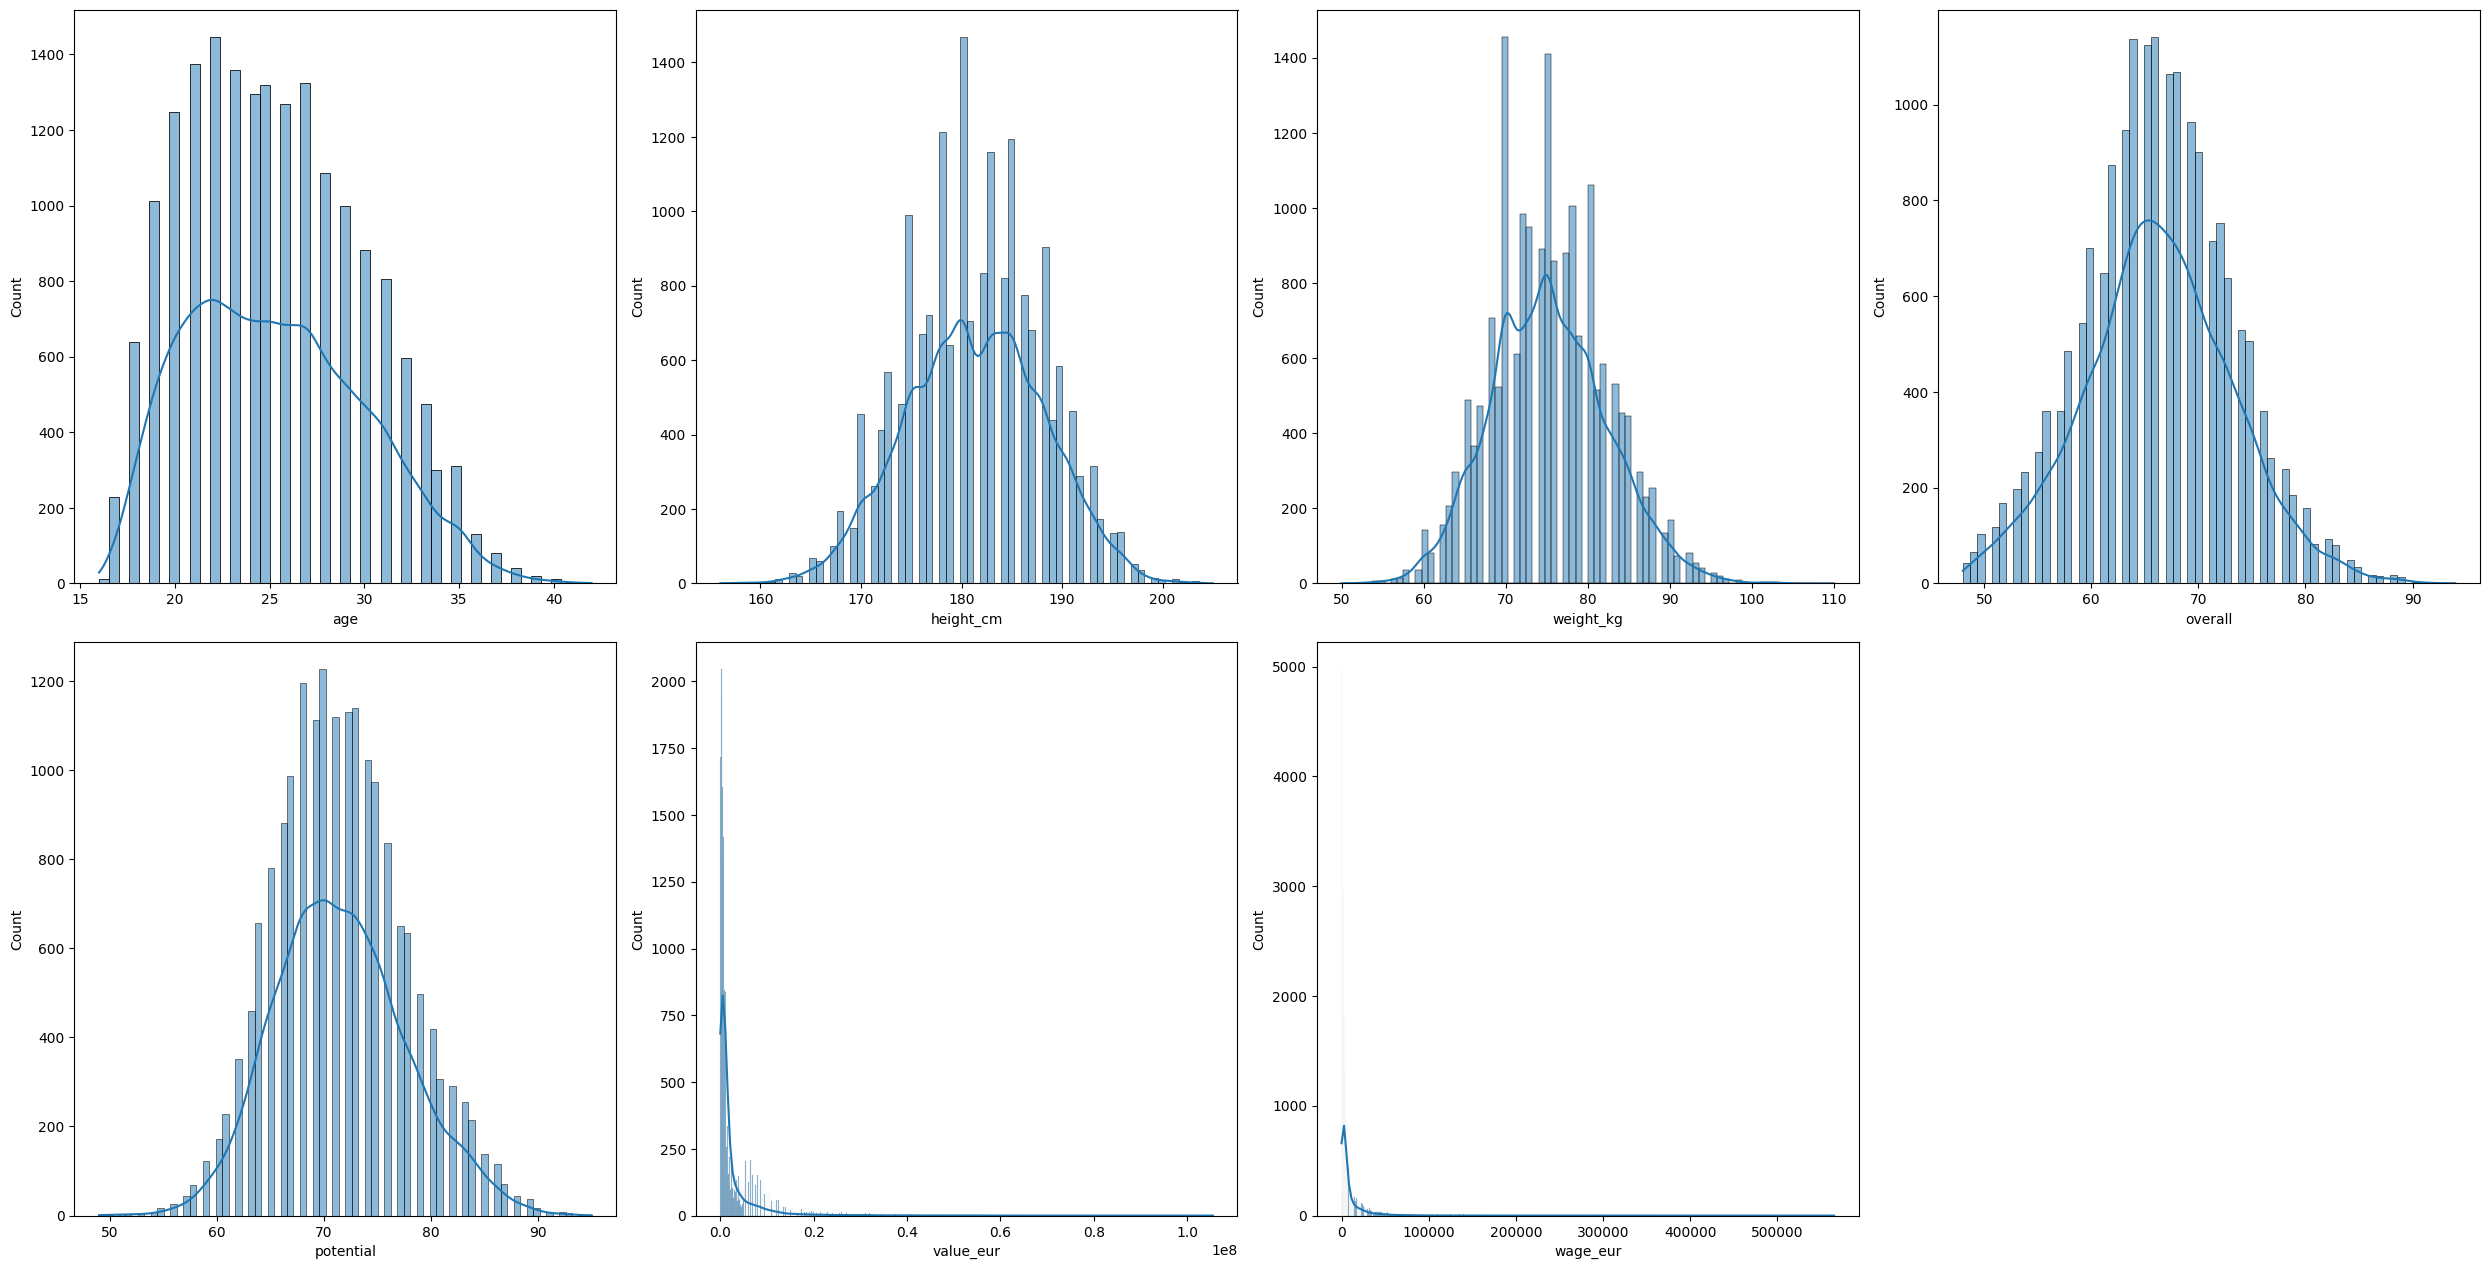

In [140]:
# using a for loop to plot histogram for numercial data.
plt.figure(figsize=(25,25))
plot_num=1
for column in col:
    if plot_num<=16:
        ax=plt.subplot(4,4,plot_num)
        sns.histplot(data=data[column],kde=True)
    plot_num+=1
plt.tight_layout()

### Insights
* Most of the players are in the age group of 20 to 34.
* The height of the players is mostly 173 to 190.
* The average weight of the players is around 80kg.
* The overall and potential are normally distributed.

### Plotting countplot on preferred foot

<Axes: xlabel='preferred_foot', ylabel='count'>

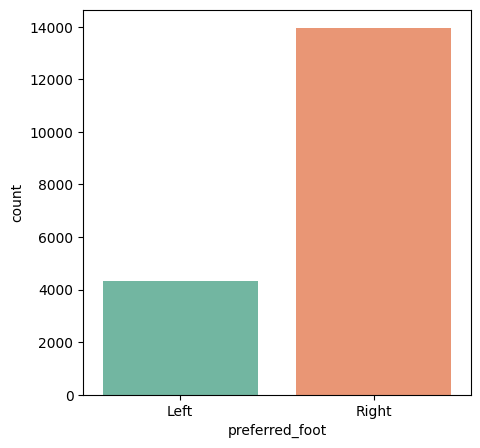

In [141]:
plt.figure(figsize=(5,5))
sns.countplot(x=data.preferred_foot,palette='Set2')

* Right foot players are more when compared to the left foot players.

In [142]:
high_wage=data[['short_name','wage_eur']].sort_values('wage_eur',ascending=False)[0:5]

In [143]:
high_wage['short_name'] 

0              L. Messi
4             E. Hazard
1     Cristiano Ronaldo
5          K. De Bruyne
22         A. Griezmann
Name: short_name, dtype: object

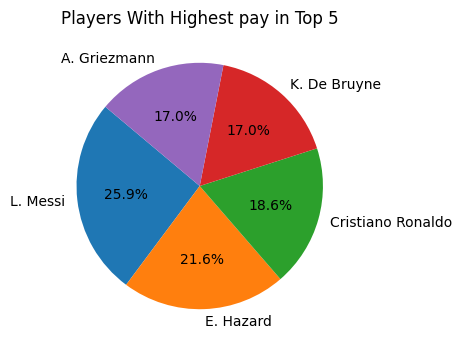

In [144]:
plt.figure(figsize=(4, 4))
plt.pie(high_wage['wage_eur'],labels=high_wage['short_name'],autopct='%1.1f%%',startangle=140)
plt.title('Players With Highest pay in Top 5')
plt.show()

* L.Messi is getting paid highest among the top players.

In [145]:
# Sorting out the players with maximum height
player_height=data[['short_name','long_name','height_cm']].sort_values('height_cm',ascending=False)[0:5]

In [146]:
player_height

short_name          long_name  height_cm
9208         T. Holý         Tomáš Holý        205
8200           A. Ba          Abdoul Ba        203
12808     A. Chapman      Aaron Chapman        203
3121   C. Pantilimon  Costel Pantilimon        203
12864       M. Qvist  Mikkel Mena Qvist        203

* Tomas Holy has the maximum height of 205 cm.

### Top players with Dribbling Skills

In [147]:
# Sorting out the players based on their Dribbling skills
player_dribbling=data[['short_name','dribbling']].sort_values('dribbling',ascending=False)[0:5]

Text(0, 0.5, 'Dribbling')

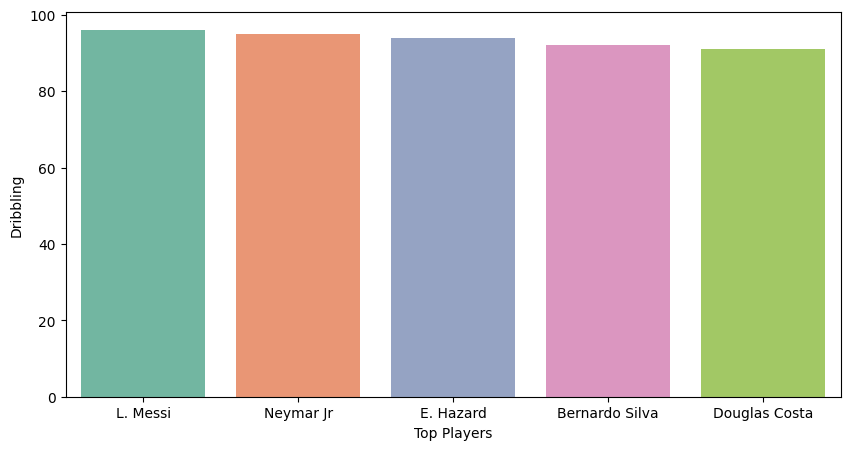

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x=player_dribbling['short_name'],y=player_dribbling['dribbling'],palette='Set2',  capsize=10)
plt.xlabel('Top Players')
plt.ylabel('Dribbling')

* L.Messi has better dripppling skills when compared to other players.

### IMPCAT OF DRIBBLING TO DEFENDING

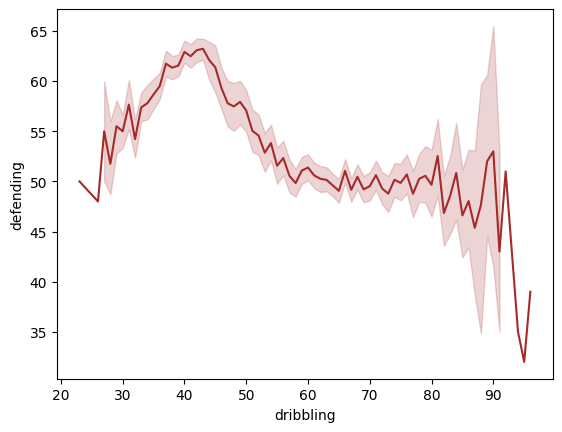

In [149]:
sns.lineplot(x='dribbling',y='defending',data=data,color='brown')
plt.show()

### Insights
* If the dribbling score is 30 to 50 then the defending score is high.
* If dribbling score is more then the defending score also less.

### RELATION BETWEEN PACE AND SHOOTING WITH RESPECT TO PREFERRED FOOT

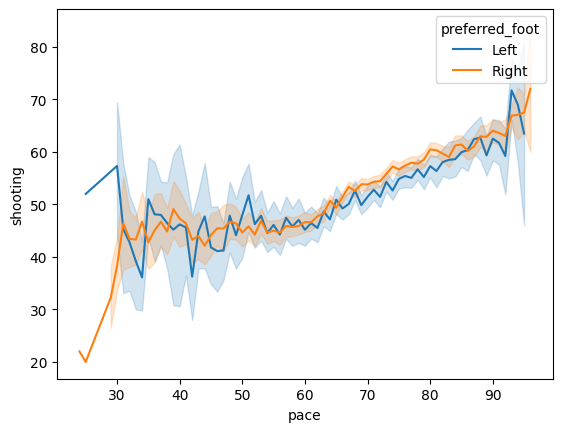

In [150]:
sns.lineplot(x='pace',y='shooting',data=data,color='brown',hue='preferred_foot')
plt.show()

### Insights
* If the player preferred left foot then the pace is less but shooting is around 50 to 60.
* If the player preferred right foot then the pace is less as well as shooting also less.

### IMPACT OF MENTALITY PENALTIES TO MENTALITY VISION

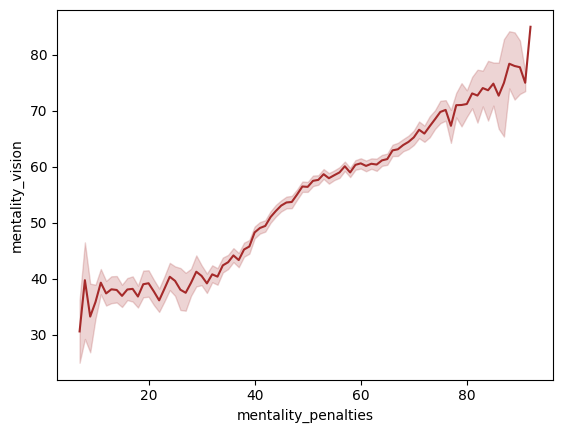

In [151]:
sns.lineplot(x='mentality_penalties',y='mentality_vision',data=data,color='brown')
plt.show()

* If the penalties is increases then the mentality vision also increases.

### Top players with highest shooting scores

Text(0, 0.5, 'shooting')

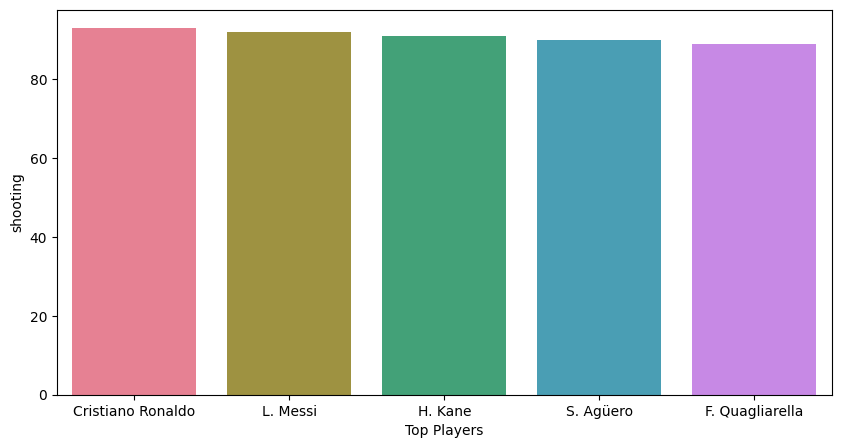

In [152]:
player_shooting=data[['short_name','shooting']].sort_values('shooting',ascending=False)[0:5]
plt.figure(figsize=(10,5))
sns.barplot(data=data,x=player_shooting['short_name'],y=player_shooting['shooting'],palette='husl')
plt.xlabel('Top Players')
plt.ylabel('shooting')

## Task-3

### Plotting graph to find top 10 countries with most number of players

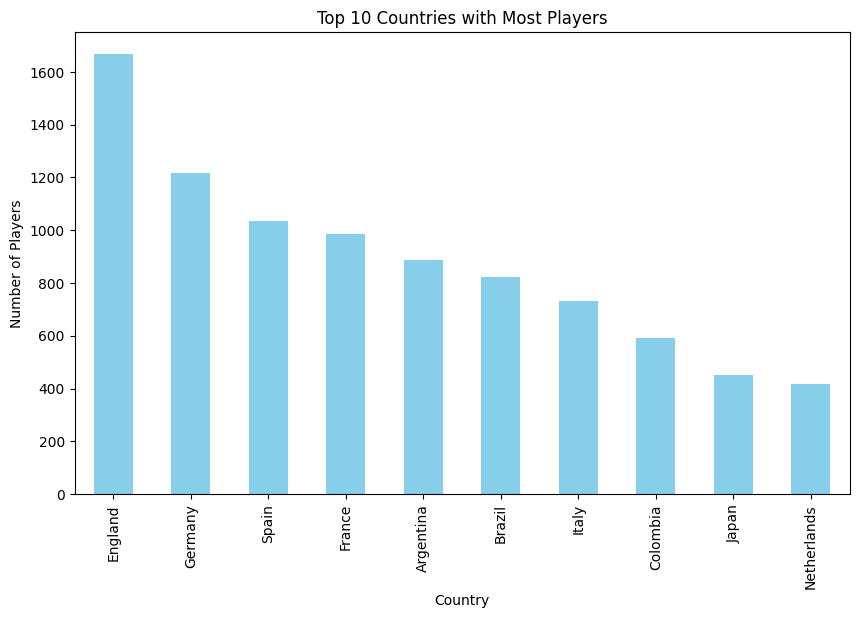

In [153]:
top_countries = data['nationality'].value_counts().head(10)

# Plot a bar graph
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

In [154]:
data.nationality.value_counts()[0:10]

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

# TASK3: 
## Part I: Prepare a rank ordered list of top 10 countries with most players


In [155]:
# Pulling out value counts of players in each nation and selecting first 10 in descending order
data.nationality.value_counts()[0:10]

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

* England is producing maximum number of players when compared to other countries.

# Task 3 Part2
### Plotting graph for age vs overall rating feature

<Axes: xlabel='overall', ylabel='age'>

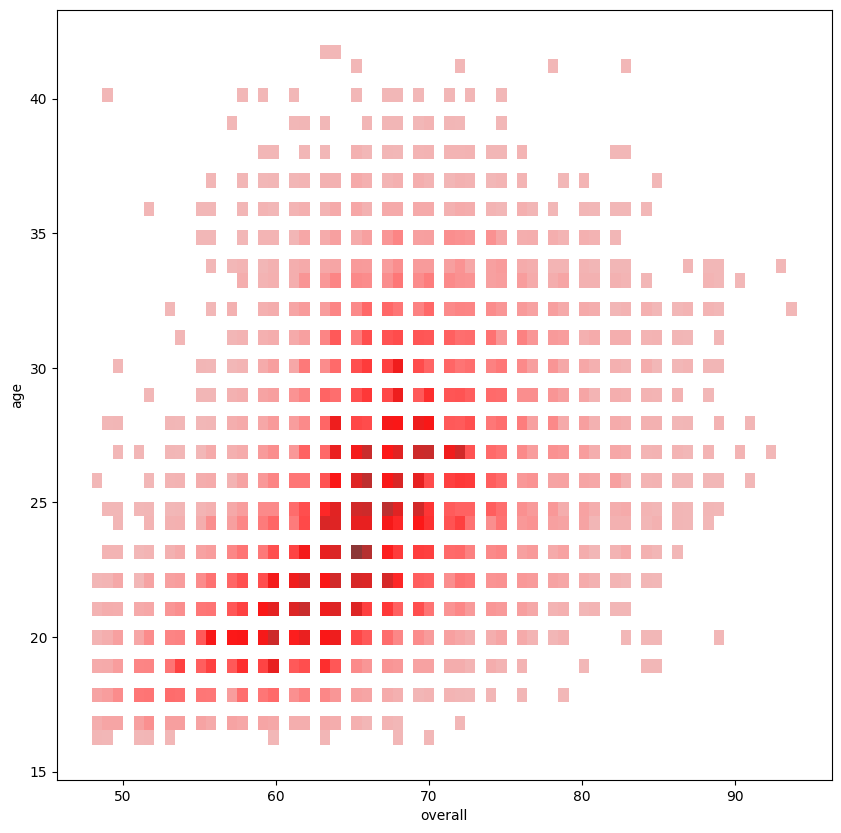

In [156]:
plt.figure(figsize=(10,10))
sns.histplot(data=data,x=data.overall,y=data.age,color='red')

### Insights
* As we can see from the plot the players overall performance is improving between the age of 20 to 34.
* Beyond 34 the overall performace is dropping/stops improving.

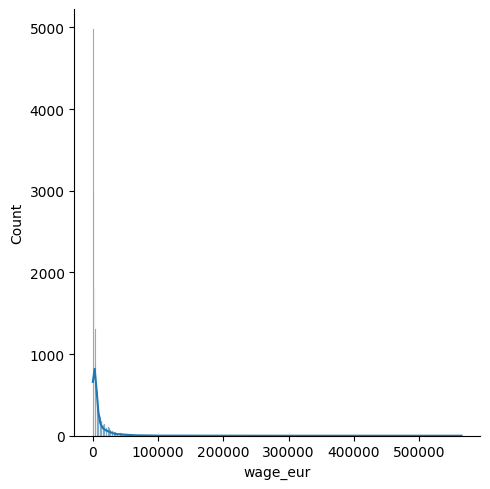

In [157]:
# Handling Outliers for wage eur.
sns.displot(data.wage_eur,kde=True)

In [158]:
# For normalized losses
Q1 = data['wage_eur'].quantile(0.25)
Q3 = data['wage_eur'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

len(data[(data['wage_eur']<lower_bound) | (data['wage_eur']>upper_bound)])/len(data)*100

12.911697122223437

In [159]:
data.loc[(data['wage_eur']<lower_bound) | (data['wage_eur']>upper_bound),'wage_eur']=data.wage_eur.median()

In [160]:
# calculating mean for striker,left winger and right winger
Striker=data.loc[data.team_position=='ST','wage_eur'].mean()
LW=data.loc[data.team_position=='LW','wage_eur'].mean()
RW=data.loc[data.team_position=='RW','wage_eur'].mean()

In [161]:
# creating a dataframe df
df1 = {'offensive players': ['Striker', 'Left winger', 'Right winger'],
        'MeanValue': [Striker, LW, RW]}

df1 = pd.DataFrame(df1)

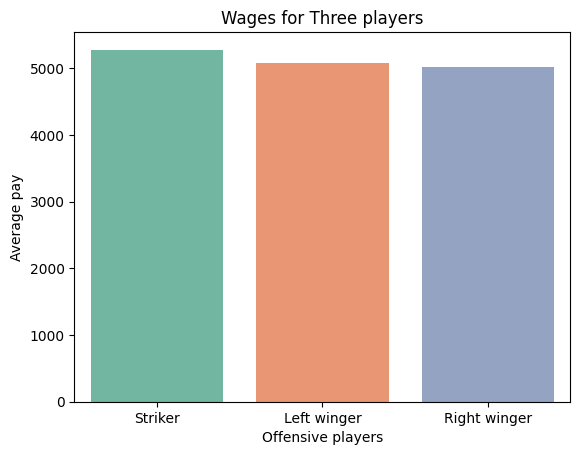

In [162]:
# Plotting the values
sns.barplot(x=df1['offensive players'], y=df1['MeanValue'],palette='Set2')
plt.title('Wages for Three players')
plt.xlabel('Offensive players')
plt.ylabel('Average pay')
plt.show()

# Task 3 Part 3
### Striker is getting paid the most when compared with Left winger and Right Winger

### We are going to drop below columns has they are not skill based attributes to cluster the data.

In [163]:
del_cols = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club','overall',
                      'potential', 'value_eur', 'wage_eur','international_reputation',
                      'body_type', 'real_face', 'release_clause_eur', 'player_tags',
                      'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
                      'nation_jersey_number', 'player_traits']

# Data Preprocessing

In [164]:
data1=data.drop(del_cols,axis=1)
data1.head()

age  height_cm  weight_kg player_positions preferred_foot  weak_foot  \
0   32        170         72       RW, CF, ST           Left          4   
1   34        187         83           ST, LW          Right          4   
2   27        175         68          LW, CAM          Right          5   
3   26        188         87               GK          Right          3   
4   28        175         74           LW, CF          Right          4   

   skill_moves      work_rate team_position nation_position  pace  shooting  \
0            4     Medium/Low            RW             NaN  87.0      92.0   
1            5       High/Low            LW              LS  90.0      93.0   
2            5    High/Medium           CAM              LW  91.0      85.0   
3            1  Medium/Medium            GK              GK   NaN       NaN   
4            4    High/Medium            LW              LF  91.0      83.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     92.0       96.0       39.0    66.0        NaN          NaN         NaN   
1     82.0       89.0       35.0    78.0        NaN          NaN         NaN   
2     87.0       95.0       32.0    58.0        NaN          NaN         NaN   
3      NaN        NaN        NaN     NaN       87.0         92.0        78.0   
4     86.0       94.0       35.0    66.0        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0          NaN       NaN             NaN                  88   
1          NaN       NaN             NaN                  84   
2          NaN       NaN             NaN                  87   
3         89.0      52.0            90.0                  13   
4          NaN       NaN             NaN                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
3                     60                67                  88   
4                     88                95                  90   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  \
0  

# Handling Missing values

In [165]:
data1=data1.dropna(subset=['ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
     'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb'],axis=0)

In [166]:
def split_and_convert(column):
    return column.str.split('+').str[0].astype(int)

In [167]:
# converting features with integer data from object to int data type
column=['ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
     'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb']
for col in column:
    data1[col]=data1[col].str.split('+').str[0].astype(int)

In [168]:
# Impute categorical data using mode(most freqent)
data1['team_position'] = data1['team_position'].replace(np.nan,'SUB')

In [169]:
# Because of high percentage of NULL values in these columns , we are dropping it .
data2=data1.drop(['nation_position','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

In [170]:
data2.info(verbose=True) # checking whether above column got dropped

<class 'pandas.core.frame.DataFrame'>
Index: 16242 entries, 0 to 18277
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         16242 non-null  int64  
 1   height_cm                   16242 non-null  int64  
 2   weight_kg                   16242 non-null  int64  
 3   player_positions            16242 non-null  object 
 4   preferred_foot              16242 non-null  object 
 5   weak_foot                   16242 non-null  int64  
 6   skill_moves                 16242 non-null  int64  
 7   work_rate                   16242 non-null  object 
 8   team_position               16242 non-null  object 
 9   pace                        16242 non-null  float64
 10  shooting                    16242 non-null  float64
 11  passing                     16242 non-null  float64
 12  dribbling                   16242 non-null  float64
 13  defending                   16242 no

# Checking for Duplicates

In [171]:
data2.duplicated().sum()

0

# Handling Outliers

In [172]:
num_data=data2.select_dtypes(include=['int','float'])
columns=num_data.columns

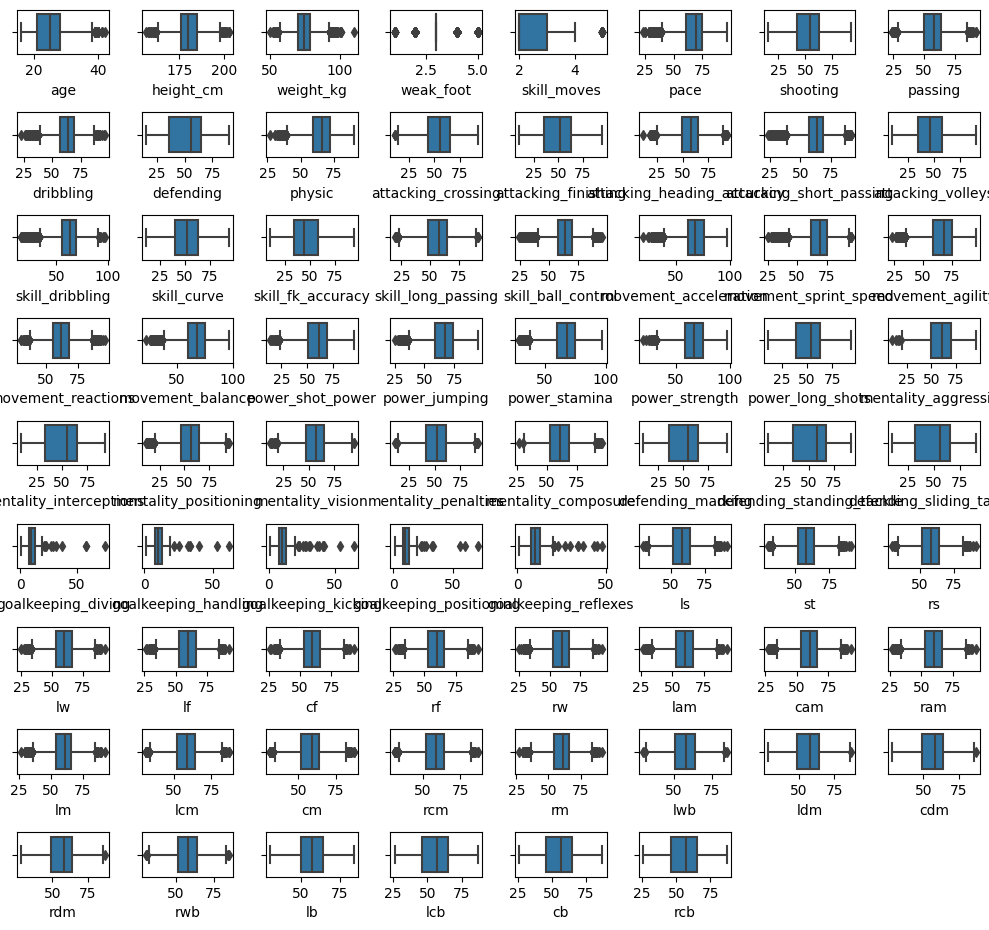

In [173]:
# Using boxplot to find the Outliers
plt.figure(figsize=(10,10))
plot_num=1
for column in columns:
    if plot_num<=70:
        ax=plt.subplot(10,8,plot_num)
        sns.boxplot(data=num_data,x=column)
    plot_num+=1
plt.tight_layout()

In [174]:
def replace_outliers_with_median(df, threshold=1.5, replace_threshold=5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = len(outliers) / len(df) * 100
        print(f"Column '{col}' has {outlier_percentage:.2f}% outliers.")
        
        if outlier_percentage <= replace_threshold: 
            # Replace outliers with median value
            median_value = df[col].median()
            df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), median_value)
    
    return df

In [175]:
replace_outliers_with_median(data2)
# checking percentage of outliers below 5%

Column 'age' has 0.13% outliers.
Column 'height_cm' has 0.30% outliers.
Column 'weight_kg' has 0.78% outliers.
Column 'weak_foot' has 35.78% outliers.
Column 'skill_moves' has 0.30% outliers.
Column 'pace' has 2.11% outliers.
Column 'shooting' has 0.00% outliers.
Column 'passing' has 0.42% outliers.
Column 'dribbling' has 3.09% outliers.
Column 'defending' has 0.00% outliers.
Column 'physic' has 0.91% outliers.
Column 'attacking_crossing' has 0.02% outliers.
Column 'attacking_finishing' has 0.00% outliers.
Column 'attacking_heading_accuracy' has 0.25% outliers.
Column 'attacking_short_passing' has 2.06% outliers.
Column 'attacking_volleys' has 0.00% outliers.
Column 'skill_dribbling' has 4.29% outliers.
Column 'skill_curve' has 0.00% outliers.
Column 'skill_fk_accuracy' has 0.00% outliers.
Column 'skill_long_passing' has 0.34% outliers.
Column 'skill_ball_control' has 2.58% outliers.
Column 'movement_acceleration' has 2.47% outliers.
Column 'movement_sprint_speed' has 3.52% outliers.
C

age  height_cm  weight_kg player_positions preferred_foot  weak_foot  \
0       32        170         72       RW, CF, ST           Left          4   
1       34        187         83           ST, LW          Right          4   
2       27        175         68          LW, CAM          Right          5   
4       28        175         74           LW, CF          Right          4   
5       28        181         70          CAM, CM          Right          5   
...    ...        ...        ...              ...            ...        ...   
18273   22        186         79               CB          Right          3   
18274   22        177         66               CB          Right          2   
18275   19        186         75               CM          Right          2   
18276   18        185         74               CM          Right          2   
18277   26        182         78               CM          Right          3   

       skill_moves      work_rate team_position  pace  shooting  passing  \
0                4     Medium/Low            RW  87.0      92.0     58.0   
1                2       High/Low            LW  90.0      93.0     82.0   
2                2    High/Medium           CAM  91.0      85.0     58.0   
4                4    High/Medium            LW  91.0      83.0     58.0   
5                4      High/High           RCM  76.0      86.0     58.0   
...            ...            ...           ...   ...       ...      ...   
18273            2    Medium/High           RES  57.0      23.0     58.0   
18274            2  Medium/Medium           SUB  58.0      24.0     33.0   
18275            2     Low/Medium           SUB  54.0      35.0     44.0   
18276            2        Low/Low           SUB  59.0      35.0     47.0   
18277            2  Medium/Medium           SUB  60.0      32.0     51.0   

       dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0           64.0       39.0    66.0                  88                   95   
1           64.0       35.0    78.0                  84                   94   
2           64.0       32.0    58.0                  87                   87   
4           64.0       35.0    66.0                  81                   84   
5           86.0       61.0    78.0                  93                   82   
...          ...        ...     ...                 ...                  ...   
18273       64.0       47.0    51.0                  21                   17   
18274       64.0       48.0    48.0                  24                   20   
18275       45.0       48.0    51.0                  32                   33   
18276       47.0       45.0    52.0                  39                   34   
18277       45.0       47.0    55.0                  44                   30   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                              70                       64                 88   
1                              89                       83                 87   
2                              62                       87                 87   
4                              61                       64                 83   
5                              55                       64                 82   
...                           ...                      ...                ...   
18273                          40                       64                 27   
18274                          42                       43                 28   
18275                          49                       53                 32   
18276                          47                       54                 28   
18277                          48                       58                 25   

       skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0                   63           93                 94                  58   
1                   89           81                 76 

# Scaling the data

In [176]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data2[columns]=scale.fit_transform(data2[columns])

In [177]:
data2.head()

age  height_cm  weight_kg player_positions preferred_foot  weak_foot  \
0  0.727273   0.200000   0.428571       RW, CF, ST           Left       0.75   
1  0.818182   0.685714   0.742857           ST, LW          Right       0.75   
2  0.500000   0.342857   0.314286          LW, CAM          Right       1.00   
4  0.545455   0.342857   0.485714           LW, CF          Right       0.75   
5  0.545455   0.514286   0.371429          CAM, CM          Right       1.00   

   skill_moves    work_rate team_position      pace  shooting   passing  \
0          1.0   Medium/Low            RW  0.839286  0.987179  0.517857   
1          0.0     High/Low            LW  0.892857  1.000000  0.946429   
2          0.0  High/Medium           CAM  0.910714  0.897436  0.517857   
4          1.0  High/Medium            LW  0.910714  0.871795  0.517857   
5          1.0    High/High           RCM  0.642857  0.910256  0.517857   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0   0.520833   0.320000    0.52            0.936709             1.000000   
1   0.520833   0.266667    0.76            0.886076             0.988235   
2   0.520833   0.226667    0.36            0.924051             0.905882   
4   0.520833   0.266667    0.52            0.848101             0.870588   
5   0.979167   0.613333    0.76            1.000000             0.847059   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.703125                 0.520833             0.9750   
1                    1.000000                 0.916667             0.9625   
2                    0.578125                 1.000000             0.9625   
4                    0.562500                 0.520833             0.9125   
5                    0.468750                 0.520833             0.9000   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         0.517857     0.987952           1.000000            0.522388   
1         0.982143     0.843373           0.785714            0.805970   
2         0.517857     0.927711           0.916667            0.865672   
4         0.517857     0.867470           0.821429            0.895522   
5         0.928571     0.891566           0.869048            0.522388   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                 0.5               0.896552               0.803922   
1                 0.5               0.862069               0.941176   
2                 0.5               0.948276               0.901961   
4                 0.5               0.948276               0.882353   
5                 0.5               0.655172               0.647059   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.950820                 0.5          0.966102          0.873239   
1          0.852459                 0.5          0.559322          1.000000   
2          1.000000                 0.5          0.779661          0.788732   
4          0.983607                 0.5          0.949153          0.816901   
5          0.704918                 0.5          0.644068          0.943662   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.534483       0.627119        0.546875          1.000000   
1       1.000000       0.796610        0.703125          0.987952   
2       0.413793       0.728814        0.250000          0.879518   
4       0.327586       0.779661        0.468750          0.831325   
5       0.448276       0.864407        0.640625          0.951807   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0              0.373333                 0.365854               0.513889   
1              0.573333                 0.231707               0.513889   
2              0.413333                 0.317073               0.930556   
4              0.453333                 0.378049               0.930556   
5              0.74

# Converting categorical to Numerical data

In [178]:
# columns with categorical data
cat_data=data2.select_dtypes(include='O')

In [179]:
cat_data.describe(include='O')

player_positions preferred_foot      work_rate team_position
count             16242          16242          16242         16242
unique              642              2              9            28
top                  CB          Right  Medium/Medium           SUB
freq               2322          12144           7839          7092

In [180]:
# using for loop to print unique values and count of categorical data
for column in cat_data:
    print(column,data2[column].unique())
    print(data2[column].value_counts())
    print('---------------------------')

player_positions ['RW, CF, ST' 'ST, LW' 'LW, CAM' 'LW, CF' 'CAM, CM' 'CB' 'CM' 'RW, ST'
 'ST, RW' 'ST' 'CDM, CM' 'CF, ST, LW' 'CAM, RW' 'CM, CDM' 'RW, LW'
 'CAM, LM, ST' 'ST, LM' 'LW, LM' 'CB, LB' 'RW, CAM, CM' 'CDM' 'CF, LM'
 'CF, ST' 'LB' 'CM, CAM, CDM' 'CF, LW, ST' 'LW' 'CB, CDM' 'RB, CM, CDM'
 'CAM, CM, LW' 'CF, ST, CAM' 'LW, CM' 'CAM, RM, RW' 'CM, CAM' 'CM, LM, RM'
 'LB, CB' 'RB' 'CAM, CF, ST' 'RW, LW, ST' 'LB, LM' 'RM, LM, CM'
 'CAM, CM, RM' 'RM, LM' 'CAM, RM' 'CF, LW, CAM' 'CAM, LM, RM' 'LM, RM, LW'
 'RM, LM, LW' 'CAM' 'CAM, CM, CF' 'LM' 'CDM, CB' 'RB, CB' 'RM, RW'
 'LM, RW, LW' 'RM, CM' 'CAM, LW, ST' 'RW, RM' 'CM, CDM, CAM' 'CM, CAM, CF'
 'LW, ST, LM' 'LM, ST' 'RM, RW, ST' 'LM, CAM, RM' 'LW, RW' 'CF, LM, LW'
 'RM, CAM' 'CF, RM, LM' 'RW, LW, CAM' 'CDM, CM, CAM' 'CDM, CB, LB'
 'ST, CAM, LW' 'ST, CF' 'RW, CAM' 'LW, LM, RW' 'RW, CAM, LW' 'RM, ST'
 'CM, CDM, RM' 'RW, CF' 'RB, RM' 'CAM, LW' 'CF, CAM, CM' 'RB, RM, CM'
 'LWB, LM, LB' 'ST, RW, LW' 'CB, LB, RB' 'RM, LM, CF' 'CAM, LM' 'LM

In [181]:
data2['Attack_work_rate']=data2.work_rate.str.split('/').str[0]
data2['Defense_work_rate']=data2.work_rate.str.split('/').str[1]

In [182]:
data2.head()

age  height_cm  weight_kg player_positions preferred_foot  weak_foot  \
0  0.727273   0.200000   0.428571       RW, CF, ST           Left       0.75   
1  0.818182   0.685714   0.742857           ST, LW          Right       0.75   
2  0.500000   0.342857   0.314286          LW, CAM          Right       1.00   
4  0.545455   0.342857   0.485714           LW, CF          Right       0.75   
5  0.545455   0.514286   0.371429          CAM, CM          Right       1.00   

   skill_moves    work_rate team_position      pace  shooting   passing  \
0          1.0   Medium/Low            RW  0.839286  0.987179  0.517857   
1          0.0     High/Low            LW  0.892857  1.000000  0.946429   
2          0.0  High/Medium           CAM  0.910714  0.897436  0.517857   
4          1.0  High/Medium            LW  0.910714  0.871795  0.517857   
5          1.0    High/High           RCM  0.642857  0.910256  0.517857   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0   0.520833   0.320000    0.52            0.936709             1.000000   
1   0.520833   0.266667    0.76            0.886076             0.988235   
2   0.520833   0.226667    0.36            0.924051             0.905882   
4   0.520833   0.266667    0.52            0.848101             0.870588   
5   0.979167   0.613333    0.76            1.000000             0.847059   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.703125                 0.520833             0.9750   
1                    1.000000                 0.916667             0.9625   
2                    0.578125                 1.000000             0.9625   
4                    0.562500                 0.520833             0.9125   
5                    0.468750                 0.520833             0.9000   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         0.517857     0.987952           1.000000            0.522388   
1         0.982143     0.843373           0.785714            0.805970   
2         0.517857     0.927711           0.916667            0.865672   
4         0.517857     0.867470           0.821429            0.895522   
5         0.928571     0.891566           0.869048            0.522388   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                 0.5               0.896552               0.803922   
1                 0.5               0.862069               0.941176   
2                 0.5               0.948276               0.901961   
4                 0.5               0.948276               0.882353   
5                 0.5               0.655172               0.647059   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.950820                 0.5          0.966102          0.873239   
1          0.852459                 0.5          0.559322          1.000000   
2          1.000000                 0.5          0.779661          0.788732   
4          0.983607                 0.5          0.949153          0.816901   
5          0.704918                 0.5          0.644068          0.943662   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.534483       0.627119        0.546875          1.000000   
1       1.000000       0.796610        0.703125          0.987952   
2       0.413793       0.728814        0.250000          0.879518   
4       0.327586       0.779661        0.468750          0.831325   
5       0.448276       0.864407        0.640625          0.951807   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0              0.373333                 0.365854               0.513889   
1              0.573333                 0.231707               0.513889   
2              0.413333                 0.317073               0.930556   
4              0.453333                 0.378049               0.930556   
5              0.74

In [183]:
data3=data2.drop(['player_positions','work_rate'],axis=1)

In [184]:
# using label encoder for converting categorical data into numerical.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()           
data3['preferred_foot']=le.fit_transform(data3['preferred_foot'])

In [185]:
data3.Attack_work_rate = data3.Attack_work_rate.map({'Low':0,'Medium':0.5,'High':1})
data3.Defense_work_rate = data3.Defense_work_rate.map({'Low':0,'Medium':0.5,'High':1})

In [186]:
data3.team_position.value_counts()

team_position
SUB    7092
RES    2552
RCB     660
LCB     660
RB      560
LB      560
ST      458
LCM     411
RCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [187]:
# Use mannual encoding because lots of labels avialble
data3.team_position = data3.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

# Feature selection

<Axes: >

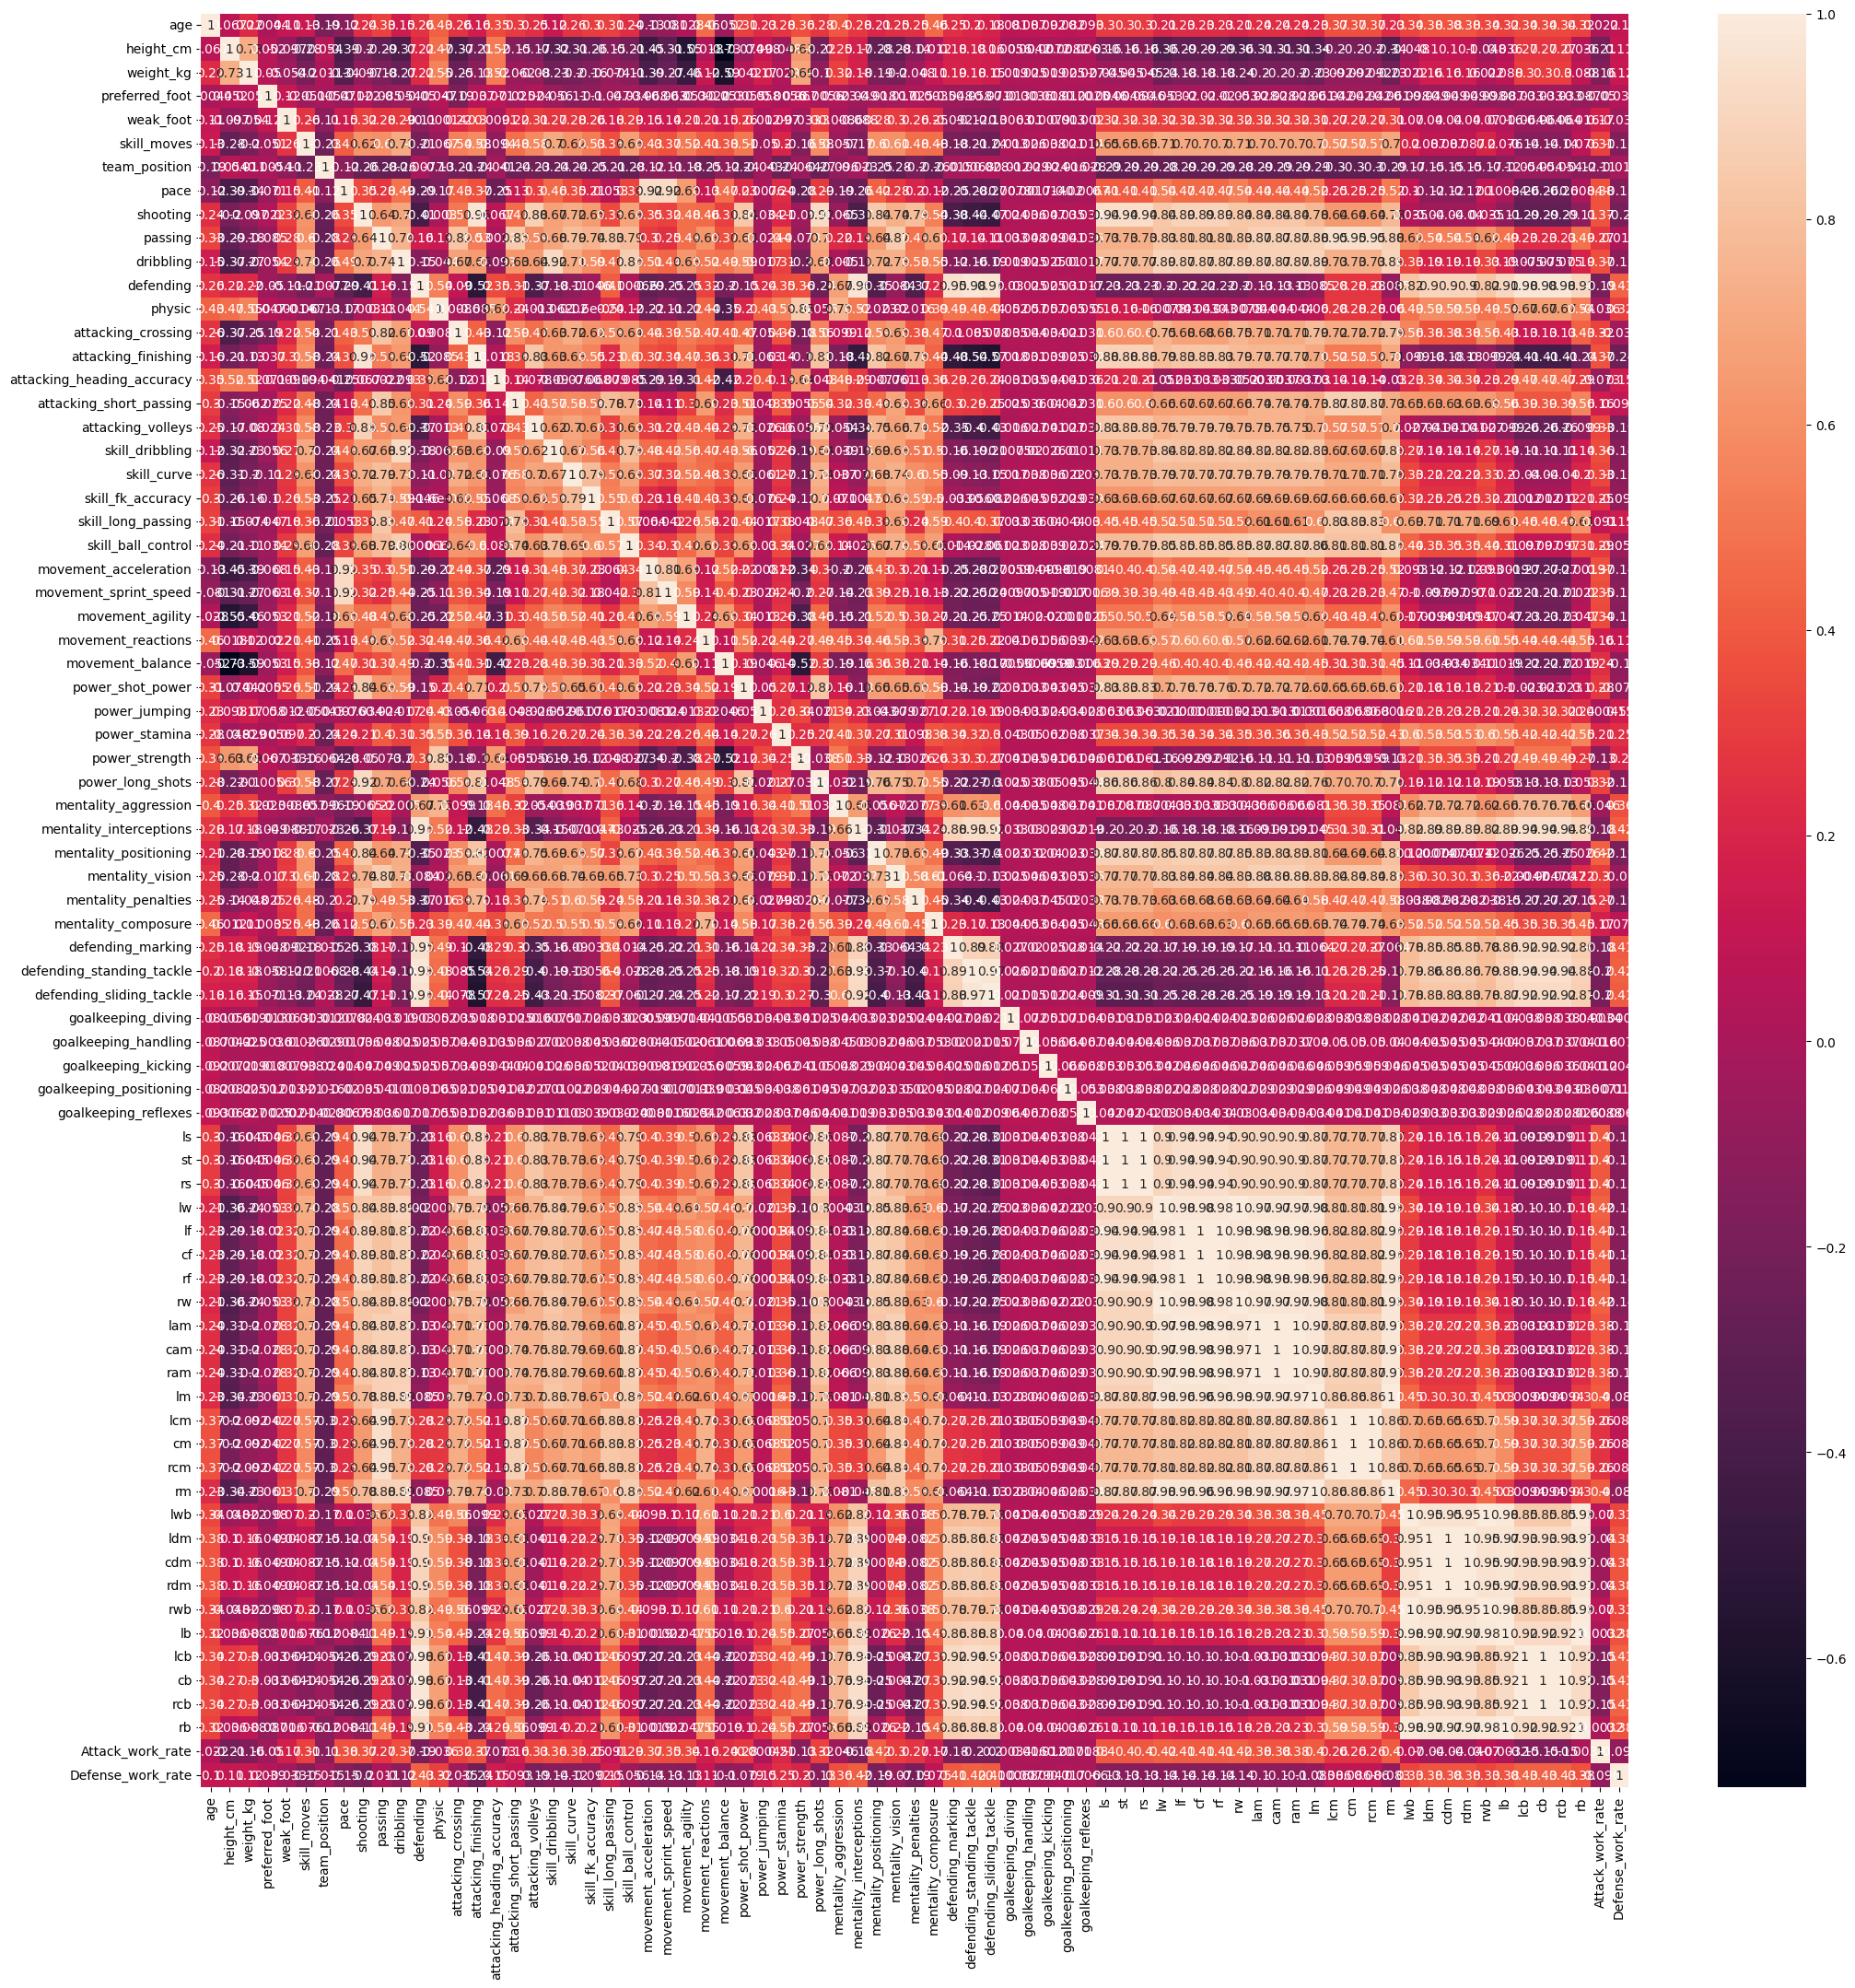

In [188]:
plt.figure(figsize=(25,25))
sns.heatmap(data3.corr(),annot=True)

In [189]:
# writing a function to find the muliti collinearity between independent variables
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [190]:
correlation(data3,0.9)

{'attacking_finishing',
 'cam',
 'cb',
 'cdm',
 'cf',
 'cm',
 'defending_marking',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'lf',
 'lm',
 'ls',
 'lw',
 'mentality_interceptions',
 'movement_acceleration',
 'movement_sprint_speed',
 'power_long_shots',
 'ram',
 'rb',
 'rcb',
 'rcm',
 'rdm',
 'rf',
 'rm',
 'rs',
 'rw',
 'rwb',
 'skill_dribbling',
 'st'}

In [191]:
data4=data3.drop(['attacking_finishing',
 'cam',
 'cb',
 'cdm',
 'cf',
 'cm',
 'defending_marking',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'lf',
 'lm',
 'ls',
 'lw',
 'mentality_interceptions',
 'movement_acceleration',
 'movement_sprint_speed',
 'power_long_shots',
 'ram',
 'rb',
 'rcb',
 'rcm',
 'rdm',
 'rf',
 'rm',
 'rs',
 'rw',
 'rwb',
 'skill_dribbling',
 'st'],axis=1)

In [192]:
data4.head()

age  height_cm  weight_kg  preferred_foot  weak_foot  skill_moves  \
0  0.727273   0.200000   0.428571               0       0.75          1.0   
1  0.818182   0.685714   0.742857               1       0.75          0.0   
2  0.500000   0.342857   0.314286               1       1.00          0.0   
4  0.545455   0.342857   0.485714               1       0.75          1.0   
5  0.545455   0.514286   0.371429               1       1.00          1.0   

   team_position      pace  shooting   passing  dribbling  defending  physic  \
0              9  0.839286  0.987179  0.517857   0.520833   0.320000    0.52   
1             10  0.892857  1.000000  0.946429   0.520833   0.266667    0.76   
2             16  0.910714  0.897436  0.517857   0.520833   0.226667    0.36   
4             10  0.910714  0.871795  0.517857   0.520833   0.266667    0.52   
5             20  0.642857  0.910256  0.517857   0.979167   0.613333    0.76   

   attacking_crossing  attacking_heading_accuracy  attacking_short_passing  \
0            0.936709                    0.703125                 0.520833   
1            0.886076                    1.000000                 0.916667   
2            0.924051                    0.578125                 1.000000   
4            0.848101                    0.562500                 0.520833   
5            1.000000                    0.468750                 0.520833   

   attacking_volleys  skill_curve  skill_fk_accuracy  skill_long_passing  \
0             0.9750     0.987952           1.000000            0.522388   
1             0.9625     0.843373           0.785714            0.805970   
2             0.9625     0.927711           0.916667            0.865672   
4             0.9125     0.867470           0.821429            0.895522   
5             0.9000     0.891566           0.869048            0.522388   

   skill_ball_control  movement_agility  movement_reactions  movement_balance  \
0                 0.5          0.950820                 0.5          0.966102   
1                 0.5          0.852459                 0.5          0.559322   
2                 0.5          1.000000                 0.5          0.779661   
4                 0.5          0.983607                 0.5          0.949153   
5                 0.5          0.704918                 0.5          0.644068   

   power_shot_power  power_jumping  power_stamina  power_strength  \
0          0.873239       0.534483       0.627119        0.546875   
1          1.000000       1.000000       0.796610        0.703125   
2          0.788732       0.413793       0.728814        0.250000   
4          0.816901       0.327586       0.779661        0.468750   
5          0.943662       0.448276       0.864407        0.640625   

   mentality_aggression  mentality_positioning  mentality_vision  \
0              0.373333               0.513889          0.513889   
1              0.573333               0.513889          0.861111   
2              0.413333               0.930556          0.972222   
4              0.453333               0.930556          0.958333   
5              0.746667               0.944444          0.513889   

   mentality_penalties  mentality_composure  goalkeeping_diving  \
0             0.813333             0.508475            0.277778   
1             0.946667             0.508475            0.333333   
2             0.506667             0.508475            0.444444   
4             0.986667             0.508475            0.555556   
5             0.866667             0.508475            0.777778   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0              0.555556             0.736842                 0.684211   
1              0.555556             0.736842                 0.684211   
2              0.444444             0.736842                 0.736842   
4              0.611111             0.263158                 0.368421   
5              0.666667             0.210526               

# PCA ( for dimensionality reduction)


In [193]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.97)
principal_components=pca.fit_transform(data4)

In [194]:
principal_components

array([[14.9684741 , -0.80877674, -0.53833916],
       [13.97206895, -0.59954803,  0.34359833],
       [ 7.97135784, -0.92521895, -0.28937757],
       ...,
       [-4.10925934,  1.05593129, -0.35848398],
       [-4.10688185,  0.9400475 , -0.48320219],
       [-4.1006822 ,  0.83867641, -0.28770162]])

In [195]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

In [196]:
pca_df

PC1       PC2       PC3
0      14.968474 -0.808777 -0.538339
1      13.972069 -0.599548  0.343598
2       7.971358 -0.925219 -0.289378
3      13.977914 -0.978200 -0.361814
4       3.986407 -1.200661  0.349358
...          ...       ...       ...
16237  -3.106797  1.027654 -0.358795
16238  -4.113954  1.087195 -0.729640
16239  -4.109259  1.055931 -0.358484
16240  -4.106882  0.940048 -0.483202
16241  -4.100682  0.838676 -0.287702

[16242 rows x 3 columns]

# KMeans Clustering

In [197]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,random_state=10)     # Trying with n_clusters =5
model.fit(pca_df)

KMeans(n_clusters=5, random_state=10)

In [198]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,model.labels_)

0.6196864288625954

Text(0, 0.5, 'WCSS')

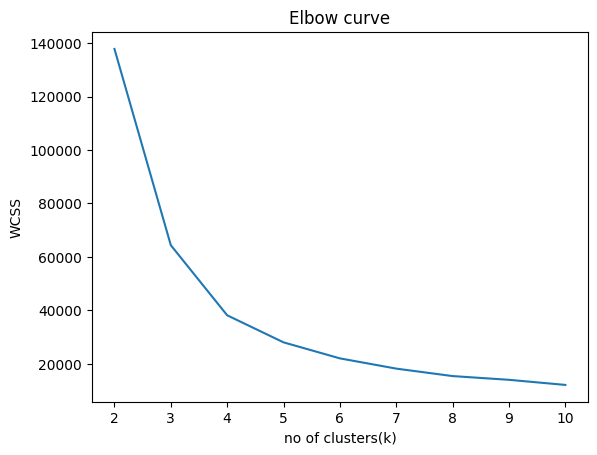

In [199]:
# Plotting ELBOW CURVE
WCSS=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=10)
    model.fit(pca_df)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('Elbow curve')
plt.xlabel('no of clusters(k)')
plt.ylabel('WCSS')

### Choosing the value of k=3 from the Elbow curve

In [200]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=10,init='k-means++')
model.fit(pca_df)

KMeans(n_clusters=3, random_state=10)

In [201]:
model.labels_

array([2, 2, 0, ..., 1, 1, 1])

In [202]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_df,model.labels_)

0.6819156534322381

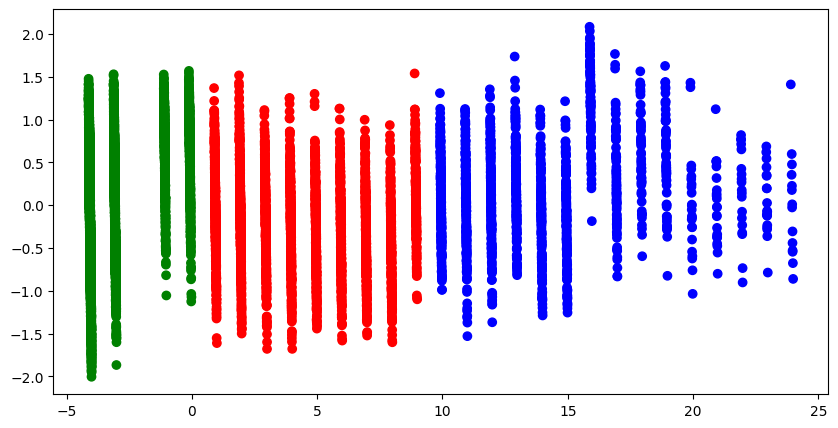

In [203]:
plt.figure(figsize=(10,5))
color_schema=np.array(["red","green",'blue'])
plt.scatter(pca_df.PC1,pca_df.PC2,color=color_schema[model.labels_])

### Plotting silhouette graphs and clustering graphs for the data

For n_clusters = 2 The average silhouette_score is : 0.7121928340038007
For n_clusters = 3 The average silhouette_score is : 0.6660474887380854
For n_clusters = 4 The average silhouette_score is : 0.6429783997489569
For n_clusters = 5 The average silhouette_score is : 0.6046422364118851
For n_clusters = 6 The average silhouette_score is : 0.37295938208997026


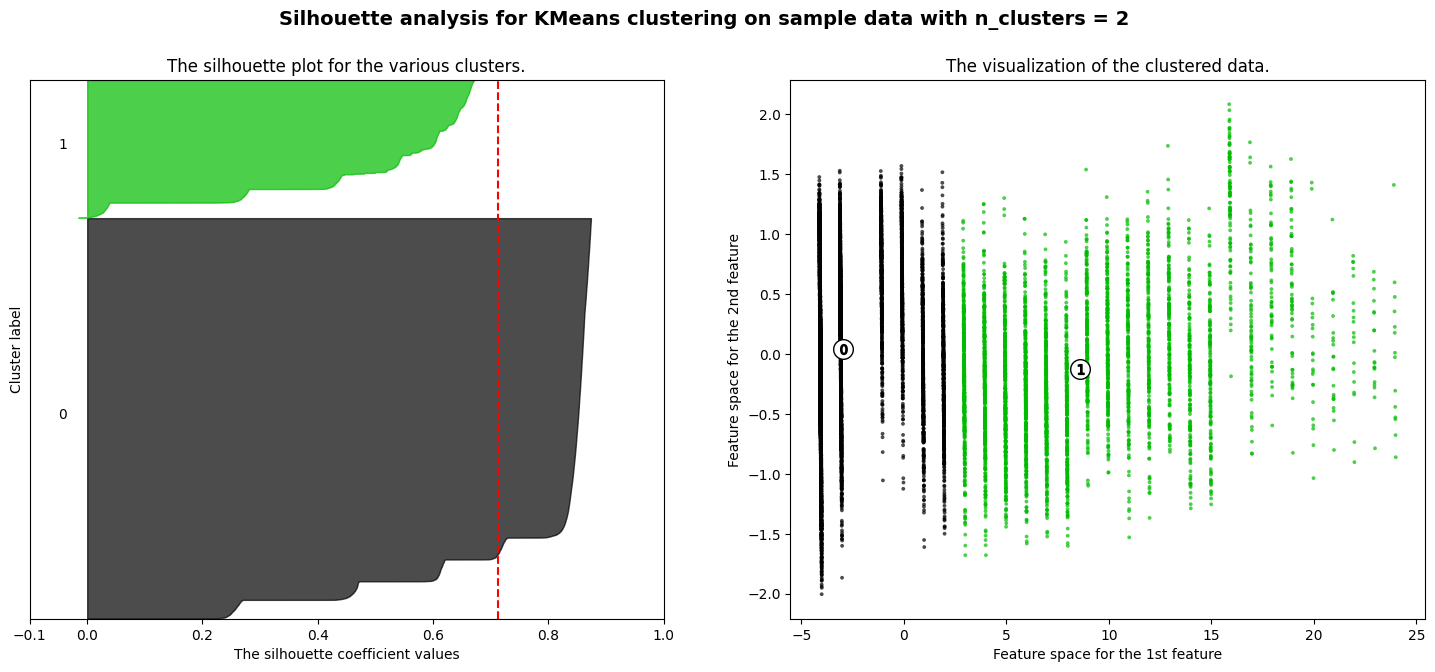

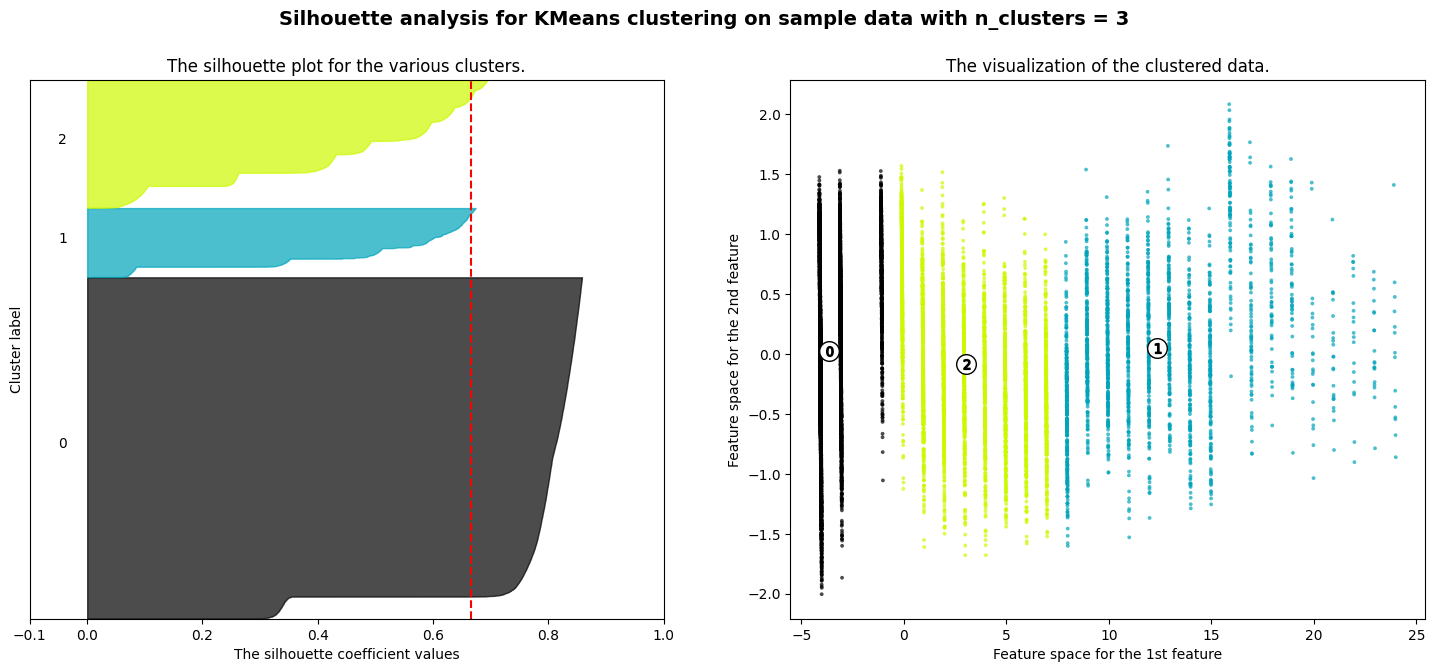

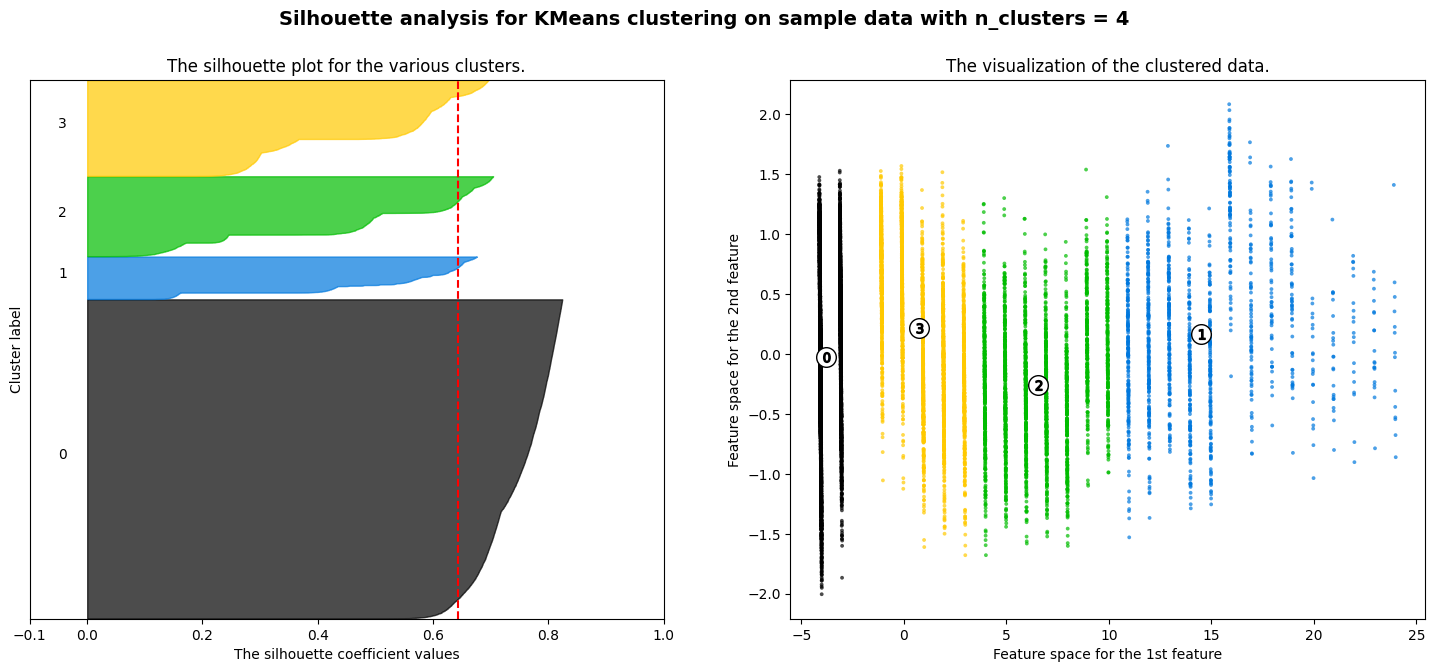

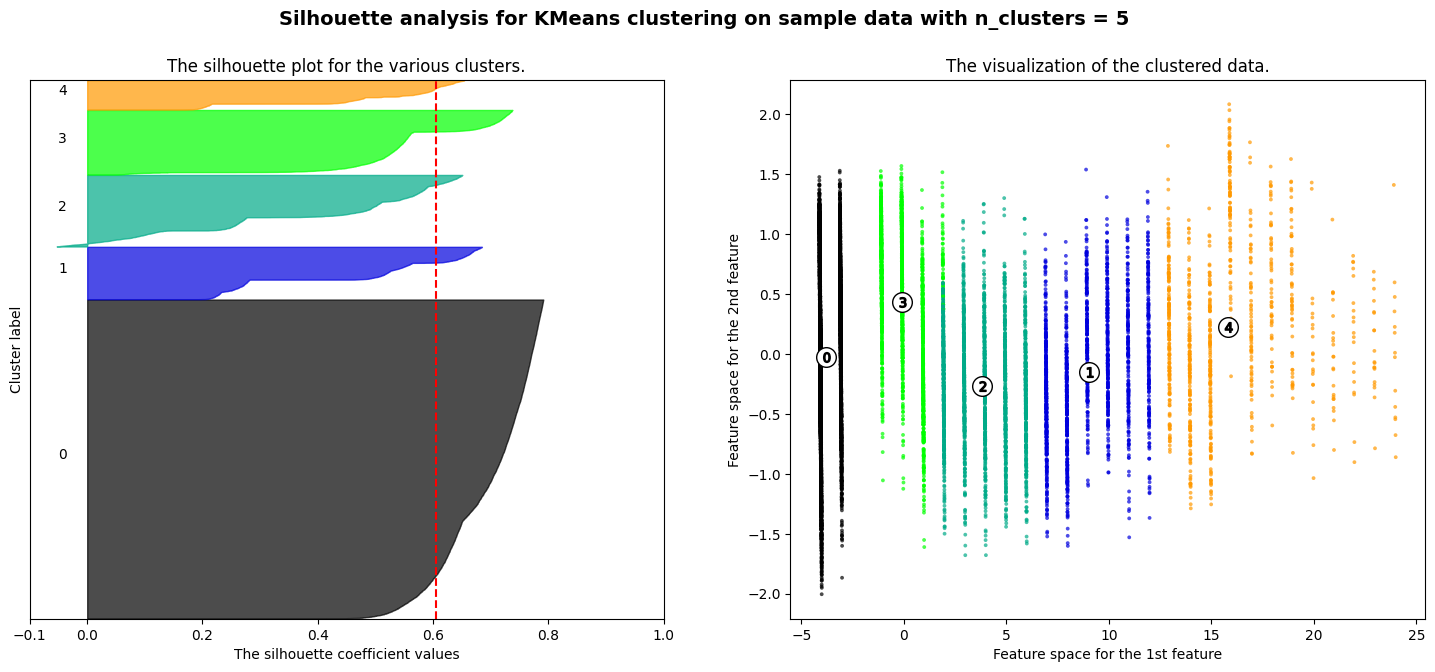

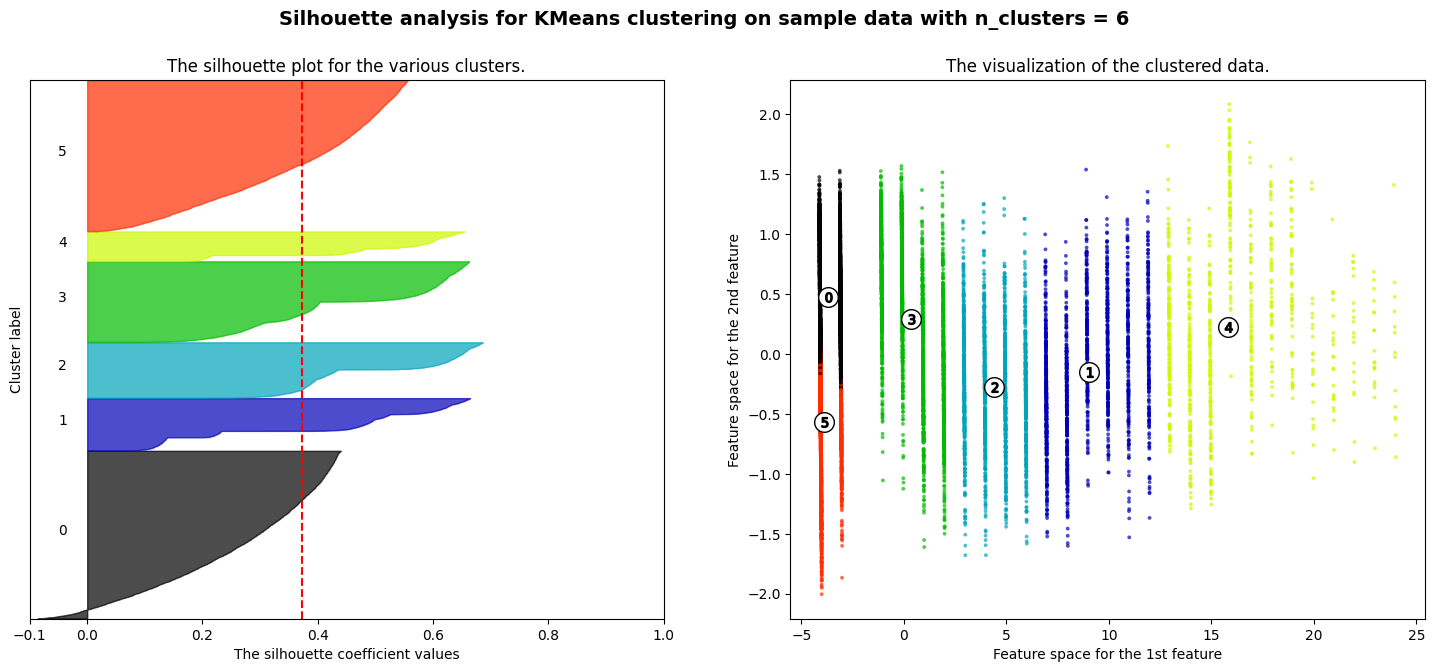

<Figure size 640x480 with 0 Axes>

In [204]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pca_df['PC1'], pca_df['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
plt.tight_layout()

# DBSCAN Clustering Method
## To see if accuracy improves using this method

In [205]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1,min_samples=2)

In [206]:
dbscan.fit(pca_df)

DBSCAN(eps=0.1, min_samples=2)

In [207]:
data4['labels']=dbscan.labels_

In [208]:
data4.labels.value_counts()

labels
 23     7035
 36     2475
-1       812
 8       591
 31      587
        ... 
 149       2
 281       2
 283       2
 147       2
 429       2
Name: count, Length: 431, dtype: int64

In [209]:
silhouette_score(pca_df,dbscan.labels_)

-0.06701573257153243

In [210]:
epsilons = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2, 20, step=3)

import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

### Hyperparameter tuning for DBSCAN clustering

In [211]:

from sklearn.metrics import silhouette_score as ss

def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of N has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, pca_df)

Combination (0.01, 2) on iteration 1 of N has 1546 clusters. Moving on
Index: 1, Score: -0.5354734833314443, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 11
Combination (0.01, 8) on iteration 3 of N has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of N has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of N has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of N has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of N has 622 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of N has 146 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of N has 69 clusters. Moving on
Index: 9, Score: -0.21602802655673517, Labels: [-1 -1 -1 ...  0  0  0], NumClusters: 39
Index: 10, Score: -0.3023144335244485, Labels: [-1 -1 -1 ...  0  0  0], NumClusters: 27
Index: 11, Score: -0.26772481173418444, Labels: [-1 -1 -1 ...  0 -1  0], NumClusters: 24
Combination (0.15142857142857144, 2) on iteratio

In [212]:
best_labels=best_dict['best_labels']

In [213]:
best_dict

{'best_epsilon': 1.0,
 'best_min_samples': 14,
 'best_labels': array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 'best_score': 0.5582144902978106}

In [214]:
best_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

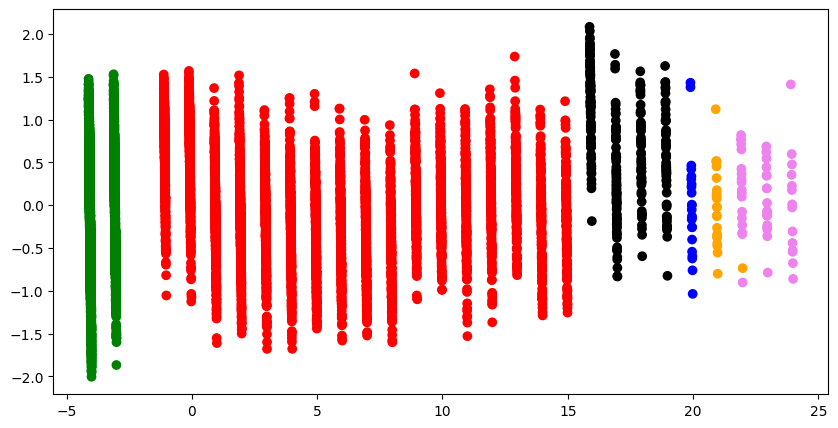

In [215]:
plt.figure(figsize=(10,5))
color_schema=np.array(["red","green","black",'blue','orange','violet'])
plt.scatter(pca_df.PC1,pca_df.PC2,color=color_schema[best_labels])

# Model Comparision Report
### We have tried with Kmeans clustering and DBSCAN clustering models and found Kmeans is performing better when compared to DBSCAN clustering with a silhouette score of 68% with Numbers of clusters =3 as per Elbow Curve.

## Silhouette score with respect to Number of clusters for KMeans Algorithm
* For n_clusters = 2 The average silhouette_score is : 0.71219283400380
* For n_clusters = 3 The average silhouette_score is : 0.66604748873808
* For n_clusters = 4 The average silhouette_score is : 0.64297839974895
* For n_clusters = 5 The average silhouette_score is : 0.60464223641188
* For n_clusters = 6 The average silhouette_score is : 0.372959382089977065

## Silhouette score with respect to Number of clusters for DBSCAN Algorithm
* Best Epsilon = 1.0,
* Best Min Samples = 14,
* Number of Clusters = 6,
* Best score =  0.5582.326.

In [216]:
# creating a dataframe df
df_models = {'Models': ['KMeans', 'DBSCAN'],
        'Scores': [ 0.68, 0.558]}

models = pd.DataFrame(df_models)

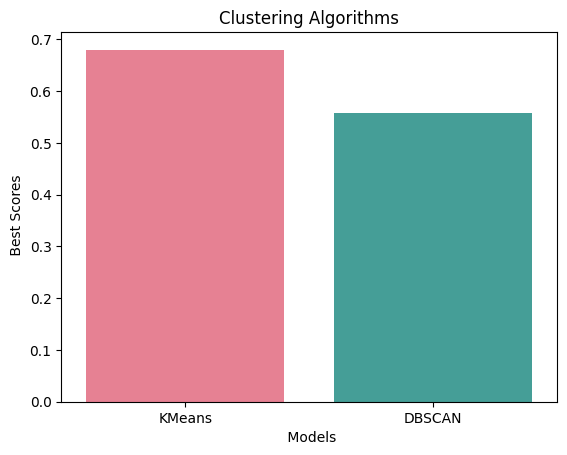

In [217]:
# Plotting the values
sns.barplot(x=models['Models'], y=models['Scores'],palette='husl')
plt.title('Clustering Algorithms')
plt.xlabel(' Models')
plt.ylabel(' Best Scores')
plt.show()

# Report On Challenges Faced
* The major challange was to perform domain analysis in order to select the columns based on skills in order to cluster the data.The remaining columns were dropped after EDA.

* Converting Categorcial features with Integers values into Integer format such as ['ls', 'st', 'rs','lw','lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb'].

* Handling Null values: we had more than 50% null values in goal keeper attributes so we tried dropping them instead of filling with zeros.And we had missing in team position attribure so we imputed with mode('SUB'). 

